In [2]:
# load the .h5 file from the directory
import h5py
path = "/data/stylegan_old/dataset/train/0.h5"

# load the file
f = h5py.File(path, 'r')
print(f.keys())

<KeysViewHDF5 ['images', 'latents']>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-1.097929 1.0803618
(6544, 3, 256, 256)


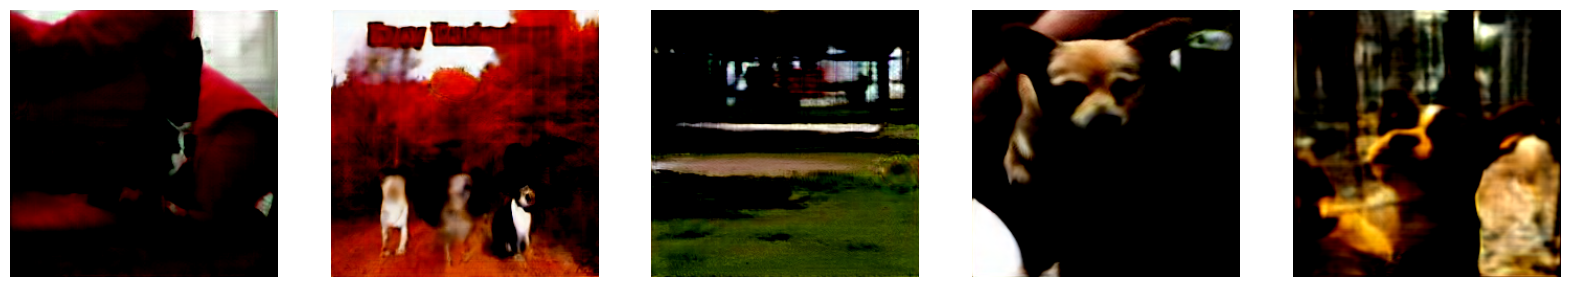

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# load the images
images = f['images']
# check the range of the images
print(min(images[0].flatten()), max(images[0].flatten()))
print(images.shape)

# display the images
fig, axes = plt.subplots(1, 5, figsize=(20, 10))
for i, ax in enumerate(axes):
    ax.imshow(images[i].transpose(1, 2, 0))
    ax.axis('off')
plt.show()


In [1]:
from stylegan_old.stylegan_generator_model import StyleGANGeneratorModel
import torch

device = torch.device('cuda:1')
gan_path = '/data/stylegan_old/pretrain/stylegan_imagenet.pth'
gan = StyleGANGeneratorModel()
state_dict = torch.load(gan_path)
var_name = 'truncation.truncation'
state_dict[var_name] = gan.state_dict()[var_name]
gan.load_state_dict(state_dict)
gan = gan.synthesis
for p in gan.parameters():
    p.requires_grad_(False)
gan = gan.to(device)   